In [1]:
print("Tejasri V - 24BAD124")

Tejasri V - 24BAD124


In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
data = pd.read_csv("/kaggle/input/datasets/organizations/uciml/sms-spam-collection-dataset/spam.csv",encoding="latin-1")

In [5]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text)
    return text

In [7]:
data['clean_message'] = data['message'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['clean_message'])

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print("MODEL PERFORMANCE")
print("-----------------")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

MODEL PERFORMANCE
-----------------
Accuracy  : 0.9668
Precision : 0.9912
Recall    : 0.7584
F1 Score  : 0.8593


In [12]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, data.index,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_df = data.loc[idx_test].copy()


In [14]:
test_df['Actual'] = label_encoder.inverse_transform(y_test)
test_df['Predicted'] = label_encoder.inverse_transform(y_pred)

In [15]:
misclassified = test_df[test_df['Actual'] != test_df['Predicted']]

In [16]:
print("\nMISCLASSIFIED EXAMPLES")
print("----------------------")
print(misclassified[['message', 'Actual', 'Predicted']].head())


MISCLASSIFIED EXAMPLES
----------------------
                                                message Actual Predicted
3057  You are now unsubscribed all services. Get ton...   spam       ham
5     FreeMsg Hey there darling it's been 3 week's n...   spam       ham
1021  Guess what! Somebody you know secretly fancies...   spam       ham
855   Talk sexy!! Make new friends or fall in love i...   spam       ham
3139  sexy sexy cum and text me im wet and warm and ...   spam       ham


In [17]:
print("\nLAPLACE SMOOTHING IMPACT")
print("-----------------------")
alphas = [0.01, 0.1, 1, 5]
for a in alphas:
    nb = MultinomialNB(alpha=a)
    nb.fit(X_train, y_train)
    preds = nb.predict(X_test)
    print(f"Alpha={a} → Accuracy={accuracy_score(y_test, preds):.4f}")




LAPLACE SMOOTHING IMPACT
-----------------------
Alpha=0.01 → Accuracy=0.9785
Alpha=0.1 → Accuracy=0.9785
Alpha=1 → Accuracy=0.9668
Alpha=5 → Accuracy=0.9085


In [18]:
cm = confusion_matrix(y_test, y_pred)


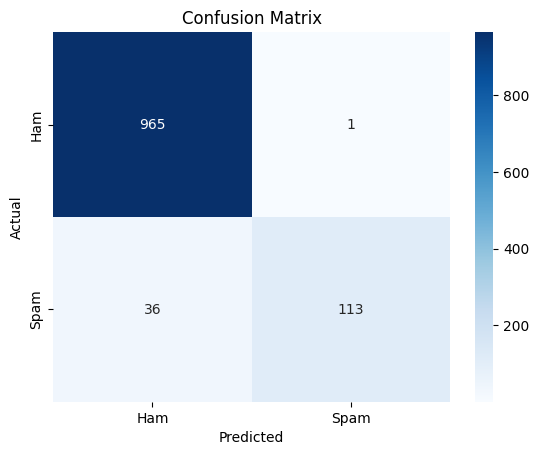

In [19]:
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
feature_names = np.array(vectorizer.get_feature_names_out())
spam_log_prob = model.feature_log_prob_[1]


In [21]:
top_spam_indices = np.argsort(spam_log_prob)[-15:]
top_spam_words = feature_names[top_spam_indices]
top_spam_values = spam_log_prob[top_spam_indices]

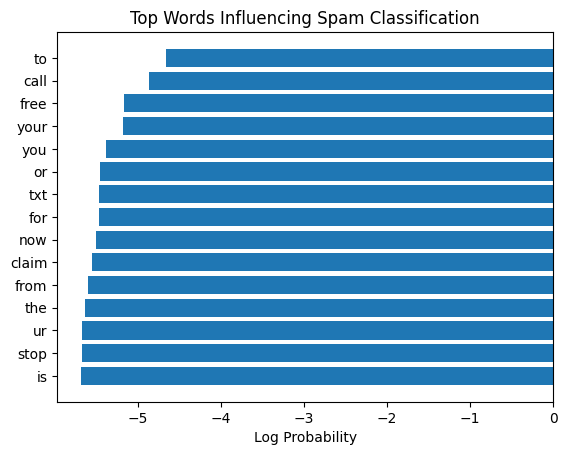

In [22]:
plt.figure()
plt.barh(top_spam_words, top_spam_values)
plt.xlabel("Log Probability")
plt.title("Top Words Influencing Spam Classification")
plt.show()

In [23]:
spam_messages = data[data['label'] == 'spam']['clean_message']
ham_messages = data[data['label'] == 'ham']['clean_message']

In [24]:
spam_vec = CountVectorizer(max_features=10)
ham_vec = CountVectorizer(max_features=10)

In [25]:
spam_counts = spam_vec.fit_transform(spam_messages).toarray().sum(axis=0)
ham_counts = ham_vec.fit_transform(ham_messages).toarray().sum(axis=0)


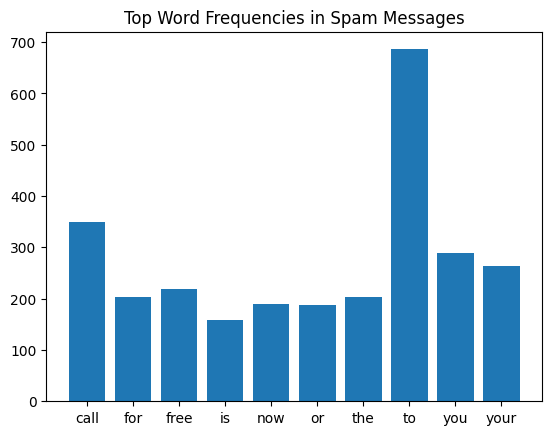

In [26]:
plt.figure()
plt.bar(spam_vec.get_feature_names_out(), spam_counts)
plt.title("Top Word Frequencies in Spam Messages")
plt.show()


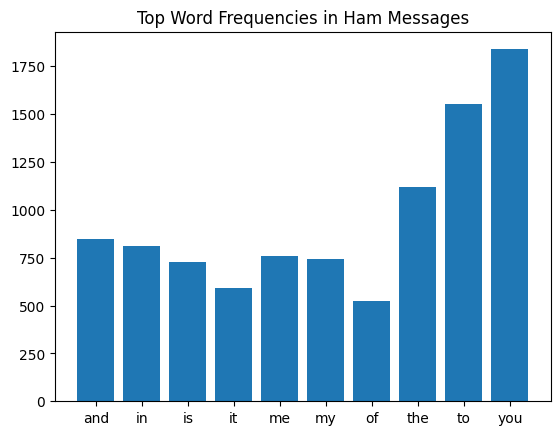

In [27]:
plt.figure()
plt.bar(ham_vec.get_feature_names_out(), ham_counts)
plt.title("Top Word Frequencies in Ham Messages")
plt.show()